In [1]:
#!pip install scikit-learn matplotlib numpy pandas seaborn
%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [19]:
import sys
sys.path.append('../')
from pipelines.images_to_df import images_to_df
from pipelines.create_image_pipeline import create_image_pipeline
from skimage.io import imread_collection
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
from skimage.io import imread
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

In [14]:
images_0 = imread_collection('../data/test/NORMAL/*.jpeg')
images_1 = imread_collection('../data/test/PNEUMONIA/*.jpeg')
#show me their shapes
len(images_0), len(images_1)



(234, 390)

In [4]:
# df_0=images_to_df(images_0,type=0)
# df_1=images_to_df(images_1,type=1)

df_0=create_image_pipeline(images_0,type=0)
df_1=create_image_pipeline(images_1,type=1)

In [5]:
#merge df_0 and df_1
df=pd.concat([df_0,df_1],ignore_index=True)
#shuffle rows in df
df=df.sample(frac=1).reset_index(drop=True)
df_labels=df['label'].copy()
df=df.drop(columns=['label'])

print(df.sample(5))

        0         1             2         3         4         5         6       
139  0.000000  0.000000  1.527175e-10  0.000013  0.000936  0.002266  0.001520  \
590  0.000931  0.001008  1.138634e-03  0.002479  0.002325  0.002043  0.003028   
527  0.000252  0.000207  3.656353e-04  0.000661  0.000813  0.000972  0.001145   
268  0.001754  0.001754  1.835217e-03  0.002860  0.002301  0.002637  0.002929   
104  0.000000  0.000014  1.089715e-03  0.001144  0.001106  0.001179  0.000018   

            7         8         9      ...     16374     16375     16376   
139  9.653740e-04  0.000710  0.000683  ...  0.000169  0.000169  0.000169  \
590  2.012596e-03  0.001931  0.001958  ...  0.001378  0.001258  0.001093   
527  1.353011e-03  0.001595  0.001757  ...  0.000177  0.000220  0.000290   
268  2.527530e-03  0.002589  0.002659  ...  0.001684  0.001416  0.001020   
104  3.681210e-07  0.000021  0.000079  ...  0.000000  0.000000  0.000000   

        16377     16378     16379         16380     1638

In [6]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df)

# Create DataFrame for visualization
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Label'] = df_labels.values.flatten()  # Extracting the labels column and flattening to 1D array

print(pca_df.sample(5))


          PC1       PC2  Label
563  0.047655  0.012690      1
117  0.036768 -0.022663      0
374  0.017829 -0.001965      1
56   0.016090 -0.014003      1
442 -0.019463 -0.027687      1


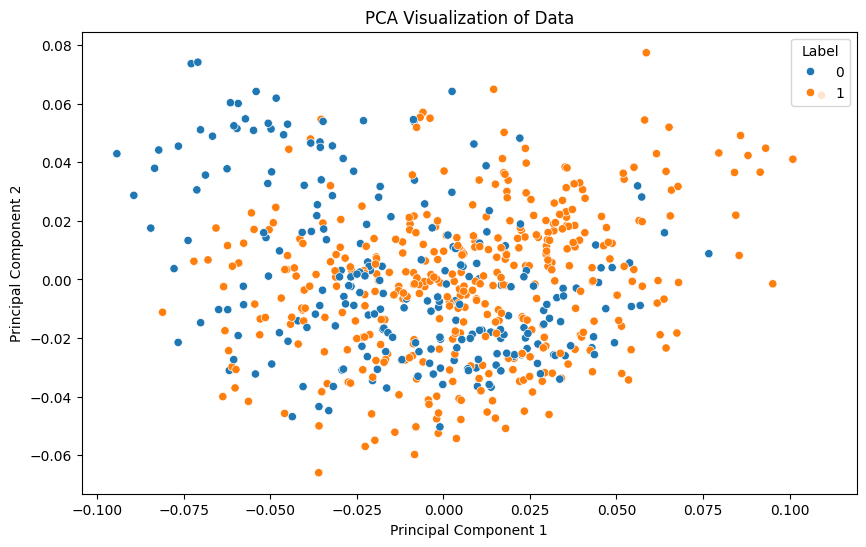

In [7]:
# Plot the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Label', data=pca_df)
plt.title('PCA Visualization of Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Label', loc='upper right')
plt.show()

In [10]:
#for pca I also want to see the explained variance ratio
print(pca.explained_variance_ratio_)

[0.24497141 0.13047555]


In [8]:
#now t-sne visualization
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(df)

# Create DataFrame for visualization
tsne_df = pd.DataFrame(data=tsne_components, columns=['TSNE_1', 'TSNE_2'])

#add df_label to that
tsne_df['Label'] = df_labels.values.flatten()

tsne_df.sample(5)


,TSNE_1,TSNE_2,Label
195,-7.406745,-16.891453,0
384,-8.747303,-18.640654,0
419,15.413507,9.694477,1
114,4.512934,-20.793962,1
407,-7.855767,18.795095,1


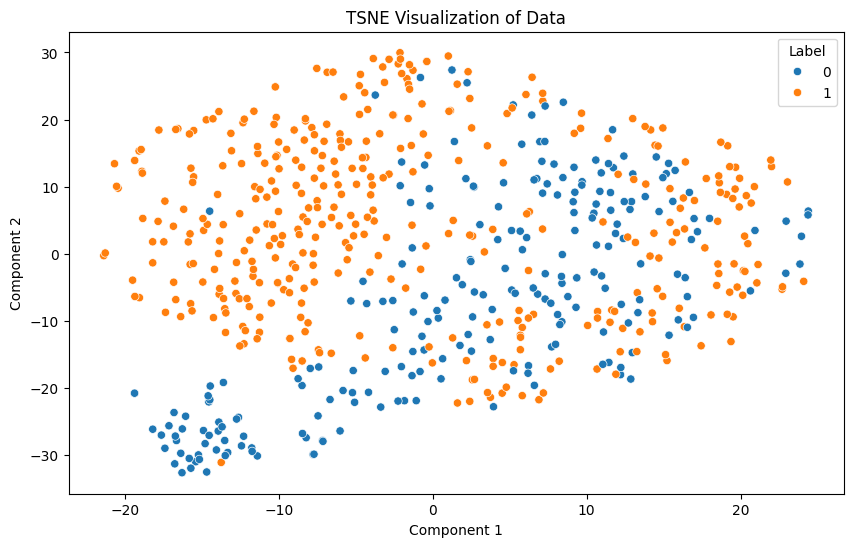

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE_1', y='TSNE_2', hue='Label', data=tsne_df)
plt.title('TSNE Visualization of Data')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Label', loc='upper right')
plt.show()

In [28]:


index_0=random.randint(0,len(images_0))


image = images_0[index_0]


# Calculate HOG features
features, hog_image = hog(image, orientations=10, pixels_per_cell=(4, 4),
                          cells_per_block=(1, 1), visualize=True)
# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 50))



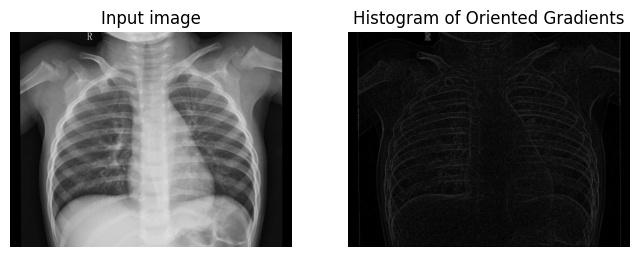

In [29]:
# Plot original and HOG image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()